# Optimized Meal Planning

## Define the model

Data

$$
\begin{aligned}
T, \text{the set of discrete time periods} \\
I, \text{the set of ingredients that are available} \\
N, \text{the set of nutrients that are tracked} \\
R, \text{the set of known recipes} \\
F_{in}, \text{the amount of nutrient } n \text{ in ingredient } i,\ \forall i \in I,\ n \in N \\
S_{n}, \text{the amount of nutrient } n \text{ that is needed each week for a healthy diet} \\
C_{i}, \text{the cost of a single quantity of ingredient } i,\ \forall i \in I \\
V_{i}, \text{the volume of a single quantity of ingredient } i,\ \forall i \in I \\
Fr, \text{the max volume of the fridge} \\
Req_{ir}, \text{the amount of ingredient i needed for recipe} \ l \ \forall i \in I, r \in R \\
MAX, \text{the maximum number of recipes that can be made in a week}
\end{aligned}
$$

Only consider whether or not to buy an ingredient as an integer variable. The argument for this is that in real life, a recipe can be made with any amount of an ingredient but stores usually sell ingredients in preset sizes.

Decision variables:
- $x_{it}$, binary variable representing if ingredient i bought in week k, $\forall i \in I, t \in T$
- $y_{rt}$, the amount of recipe $l$ to make in week k, $\forall r \in R, t \in T$
- $z_{it}$, the amount of ingredient i to store in the fridge in week k, $\forall i \in I, t \in T$

Integer Program:
\begin{align}
\min \sum_{t \in T} \sum_{i \in I} x_{it} * C_i \\
\text{s.t. } \sum_{r \in R} \sum_{i \in I} y_{rt} * Req_{ir} * F_{in} \geq S_{n}, \forall t \in T, n \in N \\
\sum_{i \in I} z_{it} * V_{i} \leq Fr, \forall t \in T \\
z_{i0} = 0, \forall i \in I \\
x_{it}*V_i + z_{i,t-1} = \sum_{r \in R} y_{rt} * Req_{ir} + z_{it}, \forall t \in T, i \in I \\
\sum_{r \in R} y_{rt} \leq MAX, \forall t \in T \\
y_{rt}, z_{it} \geq 0, \forall i \in I, t \in T, x_{it} \text{ is binary}
\end{align}

- The first constraint ensures there are enough nutrients
- The second constraint ensures that the fridge is not overfilled
- The third constraint sets the intial amount of food to 0
- The fourth constraint ensures that the amount of each ingredient being consumed is balanced by the amount being bought
- The fifth constraint limits the amount of recipes made in a week (i.e. only 7 recipes worth of recipes being made)

Cost Matrix
[4.0 15.0 5.0 7.0 5.0 6.0; 6.762387667668217 16.91652546218572 6.815722540991235 6.859121166861012 2.167408175161462 10.242861029976257; 9.41820891101393 17.811785844077246 5.693616198800933 3.0046058136084 1.0 10.230214516344445; 8.043693866974225 18.901855045472853 6.063595534301515 2.4584248860470144 2.3915305016293047 10.377415302469265; 10.082647880190583 21.17877228595978 1.0944577329987761 2.4546457031829862 1.721107166895243 9.426041870296201; 12.362423765493173 22.182186427413967 4.490645330919659 5.751340657073246 1.0 10.29401715759141; 15.164636511860513 22.024008959342865 1.1750952520799727 5.511157835475041 1.0 9.391182932377323; 14.459255002409607 25.589243388460396 5.372137577678882 3.135357275890498 1.5385482760456148 7.463770434418374; 19.227295965397055 27.12090354998107 6.35185704761639 1.8277452071364746 1.0 9.964585436849891; 22.548185153391675 31.169886497897252 6.119305826041875 1.0 2.481415258852267 10.313883567885611]



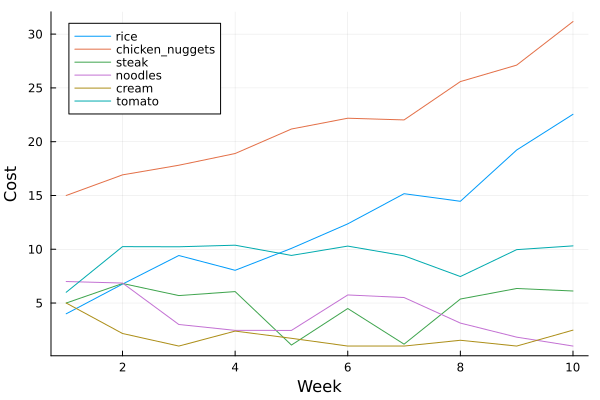


What ingredients to buy in each week


10×6 Named Matrix{Float64}
Week ╲ Ingredients │            rice  …           tomato
───────────────────┼────────────────────────────────────
1                  │             1.0  …              0.0
2                  │             0.0                 0.0
3                  │             0.0                 0.0
4                  │             0.0                 0.0
5                  │             0.0                 0.0
6                  │             0.0                 0.0
7                  │             0.0                 0.0
8                  │             0.0                 0.0
9                  │             0.0                 0.0
10                 │             0.0  …              0.0

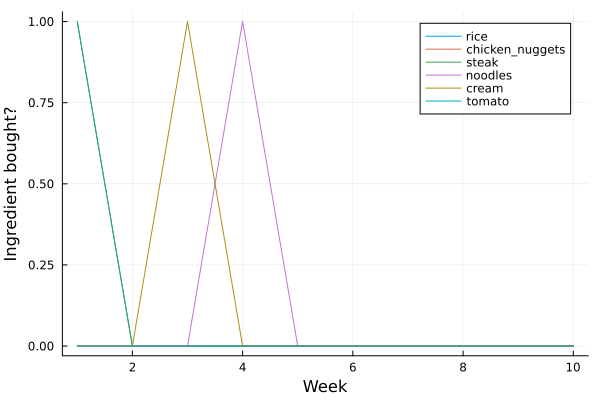


Recipes cooked per week


10×4 Named Matrix{Float64}
Week ╲ Recipes │   steak_and_rice  …     steak_alfredo
───────────────┼──────────────────────────────────────
1              │          1.11111  …               0.0
2              │          1.11111                  0.0
3              │          1.11111                  0.0
4              │              0.0             0.740741
5              │             -0.0             0.740741
6              │              0.0             0.740741
7              │              0.0             0.740741
8              │              0.0             0.740741
9              │              0.0              5.55556
10             │              0.0  …          0.740741

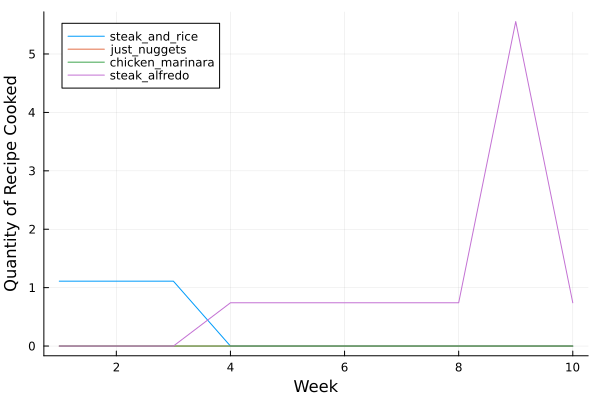


How much of each ingredient to store each week


10×6 Named Matrix{Float64}
Week ╲ Stored │            rice  …           tomato
──────────────┼────────────────────────────────────
1             │         14.4444  …              0.0
2             │         8.88889                 0.0
3             │         3.33333                 0.0
4             │         3.33333                 0.0
5             │         3.33333                 0.0
6             │         3.33333                 0.0
7             │         3.33333                 0.0
8             │         3.33333                 0.0
9             │         3.33333                 0.0
10            │         3.33333  …              0.0

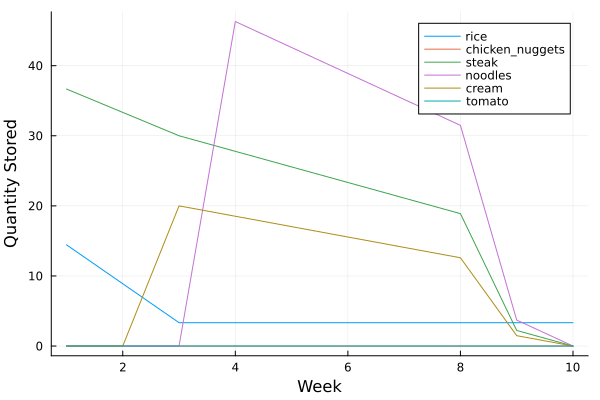


Total cost 12.458424886047014


In [157]:
# for now leave out multi-period planning and general form - too complex
using Random, NamedArrays, Plots

T_end = 10
T = 1:T_end
FR_CAP = 100

# Data 1:
# I = [:rice, :chicken_nuggets, :steak]
# N = [:calories, :protein]
# R = [:steak_and_rice, :just_nuggets]
# Req = NamedArray([5 0 3; 0 10 0], (R, I), ("Recipes", "Ingredients")) 
# F = NamedArray([300 0; 200 5; 400 30], (I, N), ("Ingredients", "Nutrients"))
# S = NamedArray([2000, 100], N, "Nutrient Requirements")
# # C = NamedArray([5 5 15; 5 5 15; 5 5 15; 5 5 15; 5 5 15;
# #     5 5 15; 5 5 15; 5 5 15; 5 5 15; 5 5 15;],
# #     (T, I), ("Week", "Ingredients"))
# V = NamedArray([20, 20, 40], I, "Volume")

#Data 2:
Random.seed!(300)
I = [:rice, :chicken_nuggets, :steak, :noodles, :cream, :tomato]
N = [:calories, :protein]
R = [:steak_and_rice, :just_nuggets, :chicken_marinara, :steak_alfredo]
Req = NamedArray([5 0 3 0 0 0; 0 10 0 0 0 0; 0 2 0 5 0 3; 0 0 3 5 2 0], (R, I), ("Recipes", "Ingredients")) 
F = NamedArray([300 0; 200 5; 400 30; 300 5; 200 10; 100 1], (I, N), ("Ingredients", "Nutrients"))
S = NamedArray([2000, 100], N, "Nutrient Requirements")
C = NamedArray(zeros(Float64, length(T), length(I)), (T, I), ("Week", "Ingredients"))
V = NamedArray([20, 20, 40, 50, 20, 20], I, "Volume")

for i in 1:length(I)
    C[1, i] = length(String(I[i]))
end

for t in 2:length(T)
    for i in 1:length(I)
        C[t, i] = C[t - 1, i] + 2 * Random.randn() + .05 * C[t - 1, i]
        if C[t, i] <= 1
            C[t, i] = 1.0
        end
    end
end


# make the model
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x[T, I], Bin)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

# Indexing Guide:
#
# t - time, i - ingredient, r - recipe, n - nutrient
# x[t, i], y[t, r], Req[r, i], F[i, n]

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

#@constraint(m, enough_ingr_for_recipes[i in I, t in T],
  #  x[t, i]*V[i] >= sum( Req[r, i]*y[t, r] for r in R )) 

@constraint(m, fridge_capacity[t in T], sum( x[t, i]*V[i] for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i]*V[i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i]*V[i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * C[t, i] for i in I, t in T ))

set_silent(m)
optimize!(m)

ingredient_values = NamedArray( [ (value(x[t,i])) for t in T, i in I ], (T, I), ("Week", "Ingredients"))
recipe_values = NamedArray( [ (value(y[t,r])) for t in T, r in R ], (T, R), ("Week", "Recipes"))
fridge_values = NamedArray( [ (value(z[t,i])) for t in T, i in I ], (T, I), ("Week", "Stored"))

println("Cost Matrix")
println(C)
println()

p1 = plot(1:10, C, xlabel="Week", ylabel="Cost" , label=permutedims(String.(I)))
display(p1)
println()

println("What ingredients to buy in each week")
display(ingredient_values)
println()

p2 = plot(1:10, ingredient_values, xlabel="Week", ylabel="Ingredient bought?" , label=permutedims(String.(I)))
display(p2)
println()

println("Recipes cooked per week")
display(recipe_values)
println()

p3 = plot(1:10, recipe_values, xlabel="Week", ylabel="Quantity of Recipe Cooked" , label=permutedims(String.(R)))
display(p3)
println()

println("How much of each ingredient to store each week")
display(fridge_values)
println()

p4 = plot(1:10, fridge_values, xlabel="Week", ylabel="Quantity Stored" , label=permutedims(String.(I)))
display(p4)
println()

println("Total cost ", objective_value(m))

In [9]:
#using DataFrames, CSV
#df = CSV.read("stigler.csv",DataFrame,delim=',')